In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data and display first 5 rows
tempdata = pd.read_csv('TemperatureData.csv')
features = pd.read_csv('TemperatureData.csv')


# print(features.head(5))
# print('The shape of our features is:', features.shape)
# features.describe()

# Use datetime for dealing with dates
import datetime

# Get years, months, and days
years = features['Year']
months = features['Month']
days = features['Day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]


# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# Set up the plotting layout
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize = (8,8))
#fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
#ax1.plot(dates, features['Temp'])
#ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Temp')

# Temperature from 1 day ago
#ax2.plot(dates, features['Temp-1'])
#ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Temp:-1')

# Temperature from 2 days ago
#ax3.plot(dates, features['Temp-2'])
#ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature (F)'); ax3.set_title('Temp:-2')

#don't plot
# plt.tight_layout(pad=3)


# One-hot encode weekdays (transform weekdays to binary columns (using pandas get_dummies)
#print(pd.get_dummies(features))
features = pd.get_dummies(features)

# Use numpy to convert to arrays
import numpy as np

# create Labels array of the target variable (aka label, dependent variable)
labels = np.array(features['Temp'])

# Remove this column from the features
# axis 1 refers to the columns
features= features.drop('Temp', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert remaining data to a numpy array (also called features)
features = np.array(features)


# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

listx = np.stack((test_labels, predictions, errors), axis=1)
#print(listx)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Training Features Shape: (273, 12)
Training Labels Shape: (273,)
Testing Features Shape: (92, 12)
Testing Labels Shape: (92,)
Mean Absolute Error: 3.01 degrees.


   Temp  Temp-1  Temp-2  Year  Month  Day Weekday
0    47      41      41  2019      1    1     Tue
1    41      41      41  2019      1    2     Wed
2    41      41      47  2019      1    3     Thu
3    38      41      41  2019      1    4     Fri
4    40      38      41  2019      1    5     Sat


ValueError: x and y must have same first dimension, but have shapes (365,) and (92,)

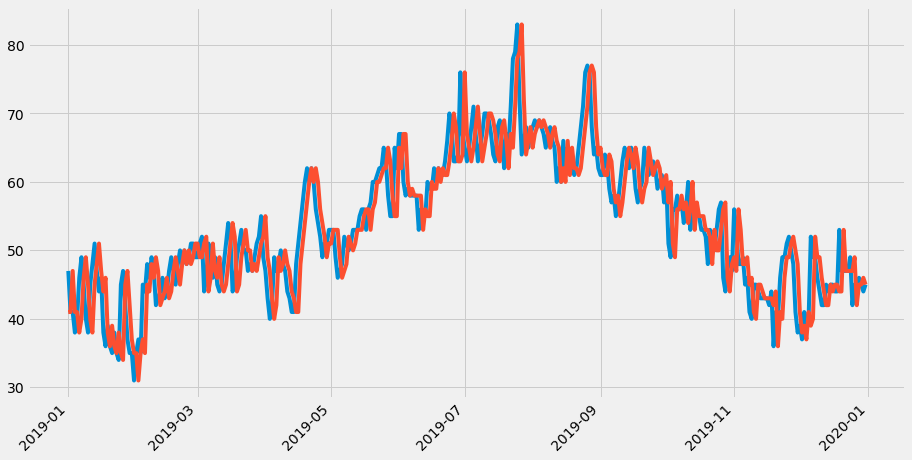

In [30]:
print(tempdata.head(5))

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Set up the plotting layout
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (14,8))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, tempdata['Temp'])
ax1.plot(dates, tempdata['Temp-2'])
ax1.plot(dates, predictions)
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Temp')
